In [1]:
import kaggle
import zipfile
import os
import pandas as pd
import torch
import torchvision
from PIL import Image

In [2]:
#!kaggle competitions download -c platesv2

In [3]:
# dirty = 
# cleand = 

In [2]:
with zipfile.ZipFile(os.getcwd() + '/plates.zip', 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())

In [5]:
# sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
test_images_dir = '/Users/macbook/PycharmProjects/Python_Practices/PyTorch/KaggleCleanedDirty/plates/test'
cleaned_train_images_dir = '/Users/macbook/PycharmProjects/Python_Practices/PyTorch/KaggleCleanedDirty/plates/train/cleaned'
dirty_train_images_dir = '/Users/macbook/PycharmProjects/Python_Practices/PyTorch/KaggleCleanedDirty/plates/train/dirty'

In [14]:
#ls

In [17]:
def plot_images(directory):
    os.chdir(directory)
    for image in os.listdir(directory):
        if image == '.DS_Store':
            print('Apsent of file in directory?!?')
            continue
        display(Image.open('{}'.format(image)))

Apsent of file in directory?!?


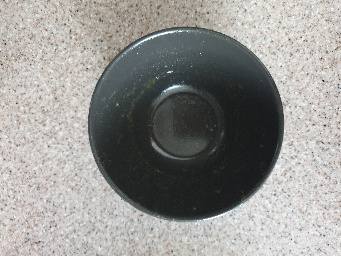

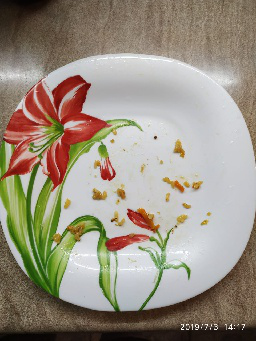

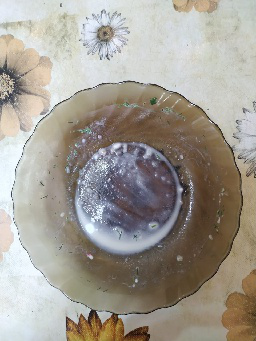

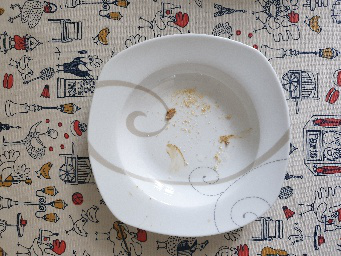

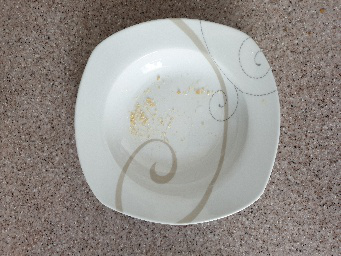

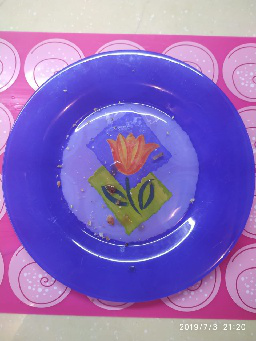

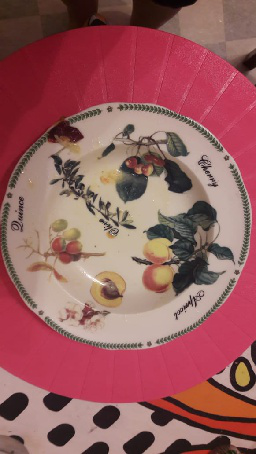

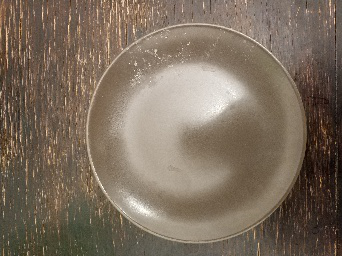

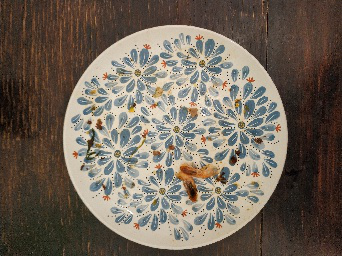

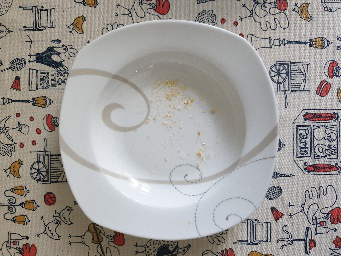

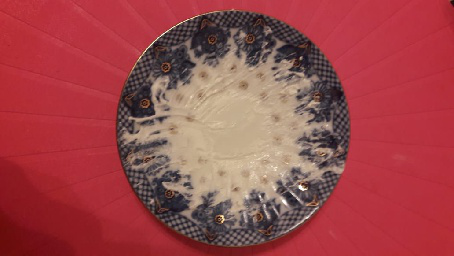

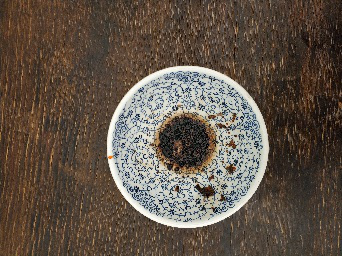

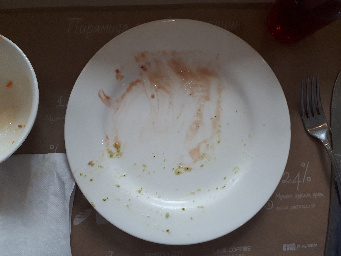

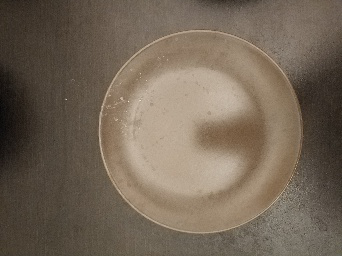

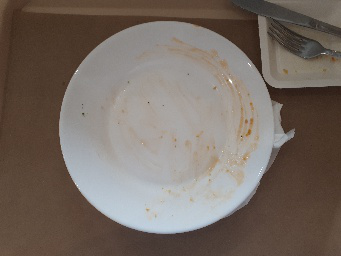

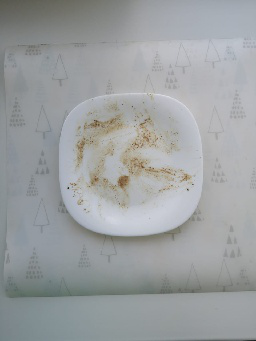

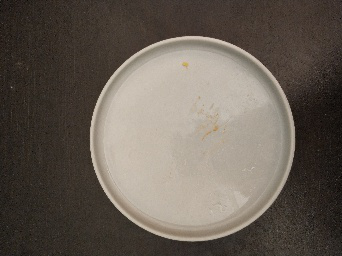

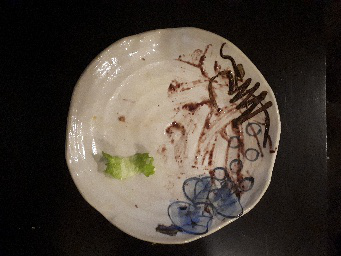

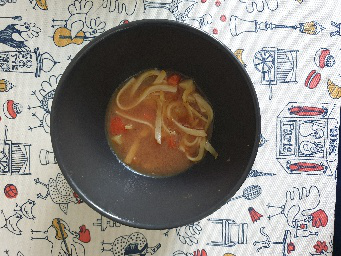

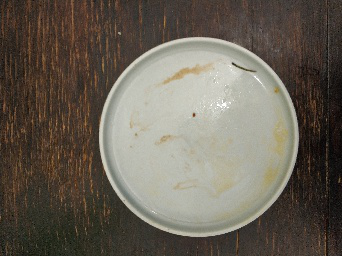

In [20]:
plot_images(dirty_train_images_dir)

### Transorm data folders in convenient usage

In [23]:
import shutil 
from tqdm import tqdm

In [42]:
pwd

'/Users/macbook/PycharmProjects/Python_Practices/PyTorch/KaggleCleanedDirty'

In [50]:
shutil.copytree?
os.makedirs?
os.chmod?

In [56]:
def train_val_folders():
    root_dir = '/Users/macbook/PycharmProjects/Python_Practices/PyTorch/KaggleCleanedDirty'
    os.chdir(root_dir)
    
    train_dir = 'train'
    val_dir = 'val'

    class_names = ['cleaned', 'dirty']

    for dir_name in [train_dir, val_dir]:
        for class_name in class_names:
            os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)
            
    for class_name in class_names:
        source_dir = os.path.join(root_dir,'plates', 'train', class_name)
        for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
            if i % 6 != 0:
                dest_dir = os.path.join(train_dir, class_name) 
            else:
                dest_dir = os.path.join(val_dir, class_name)
            shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))
        
            
train_val_folders()

100%|██████████| 21/21 [00:00<00:00, 1048.95it/s]
